# Predicting heart disease using machine learning

This notebook looks into using various Python-based maching learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not comeone has heart disease based on medical attributes

Approach: 1. Problem definition 2. Data 3. Evaluation 4. Features 5. Modelling 6. Experimentation

## 1. Problem Definitions
Given clinical presentations, can we determine if someone has heart disease or not?

## 2. Data
UCI Heart Disease Data Set from Kaggle

## 3. Evaluation
Goal: Try to get to 95% accuracy of predicting heart disease in patients

## 4. Features
**Data Dictionary**
* age: age in years
* sex: male or female (1 = male, 0 = female)
* cp: chest pain type (0 = typical, 1 = atypical, 2 = non-anginal, 3 = asymptomatic)
* trestbps: resting blood pressure on admission in mm Hg (above 130 is a problem)
* chol: serum cholesterol in mg/dL (above 200 is a problem)
* fbs: fasting blood sugar greater than 12 mg/dL (1 = true, 0 = false)
* restecg: resting electrocardiographic results (0 = nothing, 1 = ST-T Wave abnormality, 2 = left ventricular hypertrophy)
* thalach: max heart rate in beats per second
* exang: exercise induced angina (1 = yes, 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (0 = upsloping, 1 = flatsloping, 2 = downsloping)
* ca: number of major vessels (0-3) colored by fluoroscopy. The more the better
* thal: thallium stress result (3 = normal, 6 = fixed defect, 7 = reversible defect)
* target: (1 = has heart disease, 0 = does not have heart disease)

## Load Libraries

In [ ]:
# Exploratory Data Analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

# ML Models from sckikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# ML Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Load Data

In [ ]:
df = pd.read_csv("heart-disease-classification-practice.csv")
df.head()

## Exploratory Data Analysis

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types of data?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
## How many people in our data set even have heart disease? 1 = yes, 0 = no
df.target.value_counts().plot(kind = "bar", color = ["red", "green"])

In [ ]:
# What other kinds of data do we have in our set?
df.info() 

In [ ]:
# Are there any missing values?
df.isna().sum()

### Heart Disease Frequency based on Sex and compare with the target

In [ ]:
df.sex.value_counts()

In [ ]:
pd.crosstab(df.target, df.sex)

'''
72 of the 96 women in our data set have heart disease = 75%
93 of the 207 men in our data set have heart disease = 45%

Our data set is probably not representative of the population as a whole
'''

In [ ]:
# Visualization of our crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color = ["pink", "blue"]);

# Let's format our graph a bit
plt.title("Heart Disease Frequency based on Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # Make the numbers on the bottom vertical instead of horizontal

## Age vs. Max Heart Rate in Heart Disease

In [ ]:
# Create another scatter plot with positive examples
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = "orange")

# Add negative examples to scatterplot
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = "purple");

# Add info to graph
plt.title("Heart Disease Based on Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# Check the distribution of the age column using a histogram
df.age.plot.hist();

### Heart Disease Frequency by Chest Pain type

In [ ]:
pd.crosstab(df.cp, df.target)

In [ ]:
# Visualize the crosstab

pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,6), color = ["yellow", "brown"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation = 0);

In [ ]:
# Correlation matrix -  how do our independent variables (features/columns) compare with each other?

df.corr()

In [ ]:
# Visualize the correlation using a heatmap
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlOrRd");

## 5. Data Modelling

In [ ]:
# Split the data into X and y, drop the target column
X = df.drop("target", axis = 1)
y = df.target

In [ ]:
X

In [ ]:
y

In [ ]:
# Split our data into train and test sets
np.random.seed(7) # Numpy will randomly scramble our data set, but we need to make sure that it scrambles the data the same way when experimenting, to make our results reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #testing set will be 20% or total data set

In [ ]:
X_train

In [ ]:
y_train

Let's try 3 different machine learning models:
* Logistic Regression
* K Nearest Neighbors Classifier
* Random Forest Classifier

In [ ]:
# In order to save time, we can put our models in a dictionary and run them at the same time
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

# Use a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(7) # Use random seed so our results can be reproducibile
    model_scores = {} # Make a dictionary to keep the model scores
    for name, model in models.items(): # Loop through our models
        model.fit(X_train, y_train) # Fit the model to the data
        model_scores[name] = model.score(X_test, y_test) # Evaluate the model and append the score to our dictionary
    return model_scores

In [65]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361}

## Model Comparison

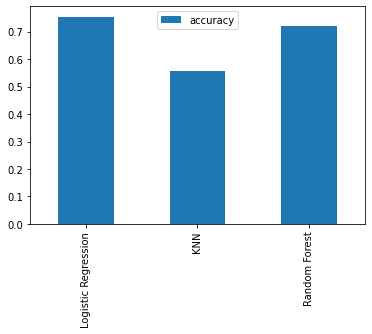

In [64]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

We have our baseline, but we haven't reached our goal of 95% accuracy. 

Next Steps:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* AUC (Area Under the Curve)


## Hyperparameter Tuning (by hand)

In [ ]:
# Let's start with KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Create KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train) # Fit the algorithim
    train_scores.append(knn.score(X_train, y_train)) # Append to the training scores list
    test_scores.append(knn.score(X_test, y_test)) # Append to the test scores list

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
plt.plot(neighbors, train_scores, label = "Training score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1)) # Adds numbers to the bottom of the graph, range 1-20 by ones
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

So, KNN initially was 55% and even with hyperparameter tuning we only got 67%. KNN probably won't work for us.

Let's try Randomized Search CV

## Hyperparameter Tuning using RandomizedSearchCV
We're going to attempt to tune:
* LogisticRegression
* RandomForestClassifier

In [52]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20), "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50), "max_depth": [None,3,5,10], "min_samples_split": np.arange(2,20,2), "min_samples_leaf": np.arange(1,20,2)}

In [53]:
# Tune LogisticRegression

np.random.seed(7)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid, cv = 50, n_iter = 20, verbose = True)

# Fit random hyperparameter search model for LogistrcRegression
rs_log_reg.fit(X_train, y_train)

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


RandomizedSearchCV(cv=50, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [60]:
# Result with the best parameters
rs_log_reg.score(X_test, y_test)

0.7540983606557377

We only tuned 2 hyperparameters: "C" and "solver" and got the same accuracy, even when searching through 1000 different tuning possibilities. Hmmm......

Let's do the same for RandomForestClassifier() 

In [61]:
np.random.seed(7)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, n_iter = 20, verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [63]:
# Result with the best parameters
rs_rf.score(X_test, y_test)

0.7377049180327869

We improved our score from 72% to 73% in this experiment...so far, LogisticRegression() is the best model

Let's try our "Brute Force" method, Grid Search CV